In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

ModuleNotFoundError: No module named 'numpy._utils'

## Read and merge the data

In [1]:
df = pd.read_csv('gsearch_jobs.csv', index_col=0)
df.drop(columns=['index'], inplace=True)

NameError: name 'pd' is not defined

In [3]:
df_nondupe = df.drop_duplicates(subset=['title', 'company_name', 'location', 'description'])
print('There are', len(df_nondupe), 'non-duplicate job postings.')
non_empty_count = df['salary_standardized'].notnull() & (df['salary_standardized'] != '')
non_empty_count = non_empty_count.sum()
print('In which there are', non_empty_count, 'postings with non-empty salary attribute.')

There are 41379 non-duplicate job postings.
In which there are 9125 postings with non-empty salary attribute.


In [4]:
df.columns

Index(['title', 'company_name', 'location', 'via', 'description', 'extensions',
       'job_id', 'thumbnail', 'posted_at', 'schedule_type', 'work_from_home',
       'salary', 'search_term', 'date_time', 'search_location', 'commute_time',
       'salary_pay', 'salary_rate', 'salary_avg', 'salary_min', 'salary_max',
       'salary_hourly', 'salary_yearly', 'salary_standardized',
       'description_tokens'],
      dtype='object')

In [5]:
companies = pd.read_csv('companies.csv')
industries = pd.read_csv('industries.csv')
company_industries = pd.read_csv('company_industries.csv')
employee_counts = pd.read_csv('employee_counts.csv')

In [6]:
companies.columns

Index(['company_id', 'name', 'description', 'company_size', 'state', 'country',
       'city', 'zip_code', 'address', 'url'],
      dtype='object')

In [7]:
companies.rename(columns={'description': 'company_description'}, inplace = True)

In [8]:
df_merged = pd.merge(df_nondupe, companies, left_on='company_name', right_on='name', how='left')
df_merged['company_id'] = df_merged['company_id'].apply(lambda x: int(x) if pd.notnull(x) else np.nan)
df_merged = pd.merge(df_merged, company_industries, on='company_id', how='left')

In [9]:
df_merged.columns

Index(['title', 'company_name', 'location', 'via', 'description', 'extensions',
       'job_id', 'thumbnail', 'posted_at', 'schedule_type', 'work_from_home',
       'salary', 'search_term', 'date_time', 'search_location', 'commute_time',
       'salary_pay', 'salary_rate', 'salary_avg', 'salary_min', 'salary_max',
       'salary_hourly', 'salary_yearly', 'salary_standardized',
       'description_tokens', 'company_id', 'name', 'company_description',
       'company_size', 'state', 'country', 'city', 'zip_code', 'address',
       'url', 'industry'],
      dtype='object')

In [10]:
non_empty_count = df_merged['company_id'].notnull() & (df_merged['company_id'] != '')
non_empty_count = non_empty_count.sum()
print('There are', non_empty_count, 'out of', len(df_merged), 'job postings with the basic information of company.')
non_empty_count = df_merged['industry'].notnull() & (df_merged['industry'] != '')
non_empty_count = non_empty_count.sum()
print('There are', non_empty_count, 'out of', len(df_merged), 'job postings with the industry information of company.')

There are 18366 out of 41622 job postings with the basic information of company.
There are 18282 out of 41622 job postings with the industry information of company.


In [11]:
non_empty_count = df_merged['description'].notnull() & (df_merged['description'] != '')
non_empty_count = non_empty_count.sum()
print('There are', non_empty_count, 'out of', len(df_merged), 'job postings with non-empty job description.')

There are 41622 out of 41622 job postings with non-empty job description.


In [12]:
df_merged.head()

,title,company_name,location,via,description,extensions,job_id,thumbnail,posted_at,schedule_type,...,name,company_description,company_size,state,country,city,zip_code,address,url,industry
0,Data Analyst,Cisco Meraki,Anywhere,via LinkedIn,"As the leader in cloud-managed IT, Cisco Merak...","['22 hours ago', 'Work from home', 'Full-time'...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,22 hours ago,Full-time,...,Cisco Meraki,"At Cisco Meraki, we create intuitive technolog...",5.0,California,US,San Francisco,94158,500 Terry A. Francois Blvd,https://www.linkedin.com/company/cisco-meraki,Software Development
1,Entry Level - Business Data Analyst (Remote),Midwest Staffing,Anywhere,via LinkedIn,As a Senior Business Analyst you will contribu...,"['53 minutes ago', 'Work from home', 'Full-tim...",eyJqb2JfdGl0bGUiOiJFbnRyeSBMZXZlbCAtIEJ1c2luZX...,https://encrypted-tbn0.gstatic.com/images?q=tb...,53 minutes ago,Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Data Analyst/Researcher,"Amyx, Inc.",United States,via Indeed,Overview:\n\nAmyx is seeking to hire a Data An...,"['3 hours ago', 'Full-time']",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QvUmVzZWFyY2...,NaN,3 hours ago,Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Data analyst/AI expert to help build a website...,Upwork,Anywhere,via Upwork,I am looking for someone to help me build an A...,"['23 hours ago', 'Work from home', 'Contractor']",eyJqb2JfdGl0bGUiOiJEYXRhIGFuYWx5c3QvQUkgZXhwZX...,NaN,23 hours ago,Contractor,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Data Analyst,Bank Street College of Education,United States,via Higher Education Recruitment Consortium (H...,Position Vacancy – Data Analyst to support the...,"['20 hours ago', 'Full-time']",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,NaN,20 hours ago,Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Split salary into pay and rate
df_merged[['salary_pay', 'salary_rate']] = df_merged['salary'].str.split(' ', 1, expand=True)

# Clean salary_pay by removing commas, dollar signs, and spaces
df_merged['salary_pay'] = df_merged['salary_pay'].str.replace(',', '').str.replace('$', '').str.replace(' ', '')

# Handle salary ranges and convert to numeric
df_merged['salary_avg'] = np.where(df_merged['salary_pay'].str.contains("–"), np.NaN, df_merged['salary_pay'])
df_merged['salary_min'] = np.where(df_merged['salary_pay'].str.contains("–"), df_merged['salary_pay'], np.NaN)
df_merged[['salary_min', 'salary_max']] = df_merged.salary_min.str.split("–", 1, expand=True)

# Convert K to thousands and handle numeric conversion
for column in ['salary_avg', 'salary_min', 'salary_max']:
    df_merged[column] = df_merged[column].str.replace("K", "000")
    df_merged[column] = pd.to_numeric(df_merged[column], errors='coerce')

# Calculate average salary for ranges
df_merged['salary_avg'] = np.where(df_merged['salary_min'].notnull(),
                                   (df_merged['salary_min'] + df_merged['salary_max']) / 2,
                                   df_merged['salary_avg'])

# Calculate hourly and yearly salaries
df_merged['salary_hourly'] = np.where(df_merged['salary_rate'] == 'an hour', df_merged['salary_avg'], np.NaN)
df_merged['salary_yearly'] = np.where(df_merged['salary_rate'] == 'a year', df_merged['salary_avg'], np.NaN)

# Standardize salary to annual
salary_rate = {'a year': 1, 'an hour': 2080, 'a month': 12}
df_merged['salary_standardized'] = df_merged.apply(
    lambda row: row['salary_avg'] * salary_rate.get(row['salary_rate'], np.NaN) if pd.notnull(row['salary_avg']) else np.NaN,
    axis=1
)

# Used to check results as built above
salary_df = df_merged[~df_merged['salary'].isnull()]
salary_df = salary_df[['company_name', 'salary', 'salary_pay', 'salary_rate', 'salary_avg', 'salary_min', 'salary_max', 'salary_standardized', 'salary_hourly', 'salary_yearly']]
pd.set_option('display.max_rows', salary_df.shape[0]+1)
salary_df.head(10)

C:\Users\FS143695\AppData\Local\Temp\ipykernel_23540\1344839336.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_merged['salary_pay'] = df_merged['salary_pay'].str.replace(',', '').str.replace('$', '').str.replace(' ', '')


,company_name,salary,salary_pay,salary_rate,salary_avg,salary_min,salary_max,salary_standardized,salary_hourly,salary_yearly
0,Meta,101K–143K a year,101K–143K,a year,122000.000,101000.00,143000.00,122000.0,NaN,122000.0
3,Upwork,15–25 an hour,15–25,an hour,20.000,15.00,25.00,41600.0,20.000,NaN
4,Krispy Kreme,90K–110K a year,90K–110K,a year,100000.000,90000.00,110000.00,100000.0,NaN,100000.0
10,Aquent,54.00–60.52 an hour,54.00–60.52,an hour,57.260,54.00,60.52,119100.8,57.260,NaN
14,CIBA Insurance Services,90K–130K a year,90K–130K,a year,110000.000,90000.00,130000.00,110000.0,NaN,110000.0
20,Saint Louis County Clerks Office,18.33–28.20 an hour,18.33–28.20,an hour,23.265,18.33,28.20,48391.2,23.265,NaN
25,Upwork,50–80 an hour,50–80,an hour,65.000,50.00,80.00,135200.0,65.000,NaN
38,Upwork,8–30 an hour,8–30,an hour,19.000,8.00,30.00,39520.0,19.000,NaN
48,Sompo International,95K–150K a year,95K–150K,a year,122500.000,95000.00,150000.00,122500.0,NaN,122500.0
64,LeadStack Inc.,60–65 an hour,60–65,an hour,62.500,60.00,65.00,130000.0,62.500,NaN


## Data Cleaning and EDA

In [13]:
# Remove leading and trailing spaces
df_merged['location'] = df_merged['location'].str.strip()

# Standardize the format (e.g., remove extra spaces within the string)
df_merged['location'] = df_merged['location'].str.replace(r'\s+', ' ', regex=True)

# Clean skills
df_merged['description_tokens'] = df_merged['description_tokens'].apply(lambda x: re.findall(r"'(.*?)'", x))

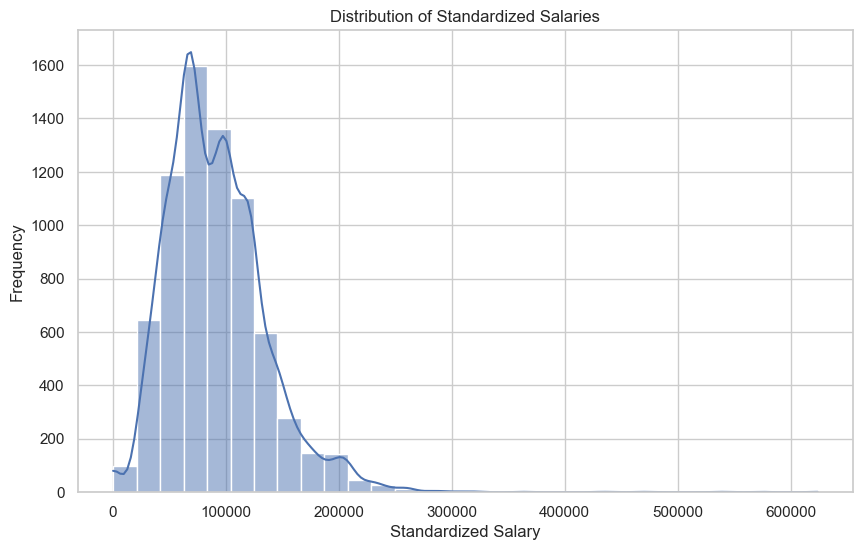

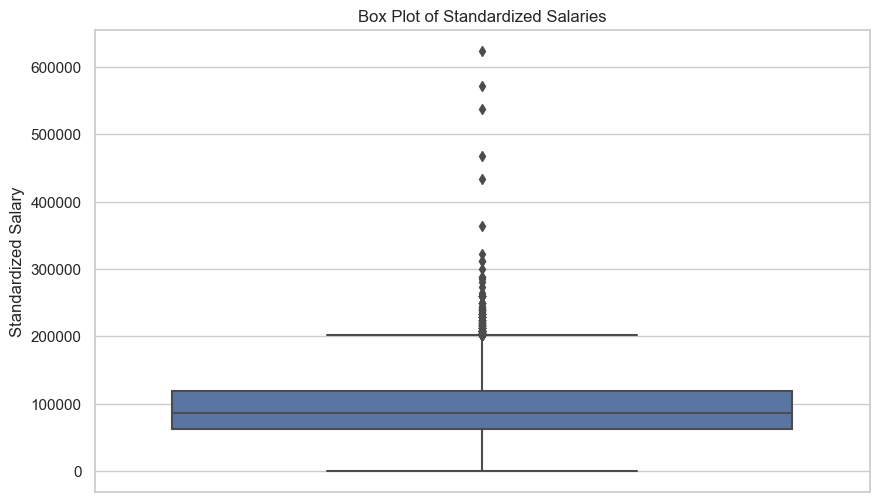

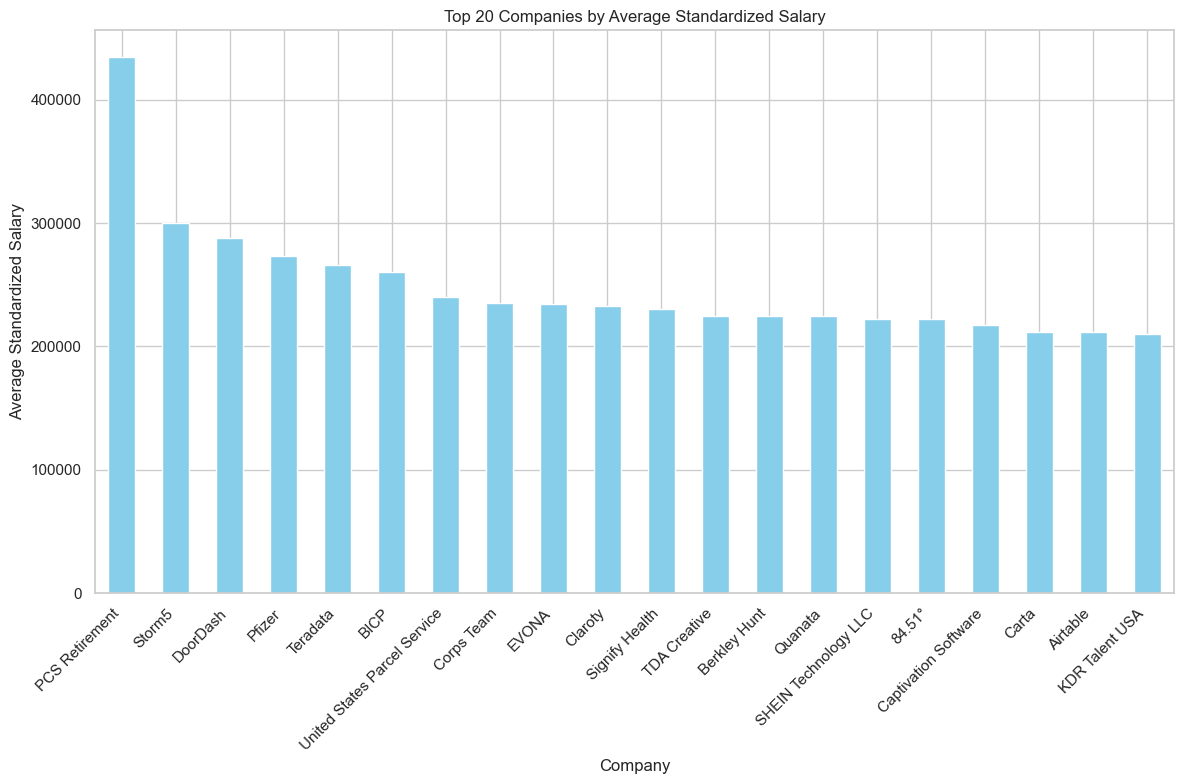

In [ ]:
# Histogram of Salary Standardized
plt.figure(figsize=(10, 6))
sns.histplot(salary_df['salary_standardized'], bins=30, kde=True)
plt.xlabel('Standardized Salary')
plt.ylabel('Frequency')
plt.title('Distribution of Standardized Salaries')
plt.show()

# Box Plot of Salary Standardized
plt.figure(figsize=(10, 6))
sns.boxplot(y=salary_df['salary_standardized'])
plt.ylabel('Standardized Salary')
plt.title('Box Plot of Standardized Salaries')
plt.show()

# Bar Plot of Average Salary by Company
average_salary_by_company = salary_df.groupby('company_name')['salary_standardized'].mean().sort_values(ascending=False).head(20)
plt.figure(figsize=(12, 8))
average_salary_by_company.plot(kind='bar', color='skyblue')
plt.xlabel('Company')
plt.ylabel('Average Standardized Salary')
plt.title('Top 20 Companies by Average Standardized Salary')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
df_merged[['salary_avg', 'salary_min', 'salary_max', 'salary_standardized']].describe()

,salary_avg,salary_min,salary_max,salary_standardized
count,7257.000000,6819.000000,6819.000000,7257.000000
mean,36847.218111,29201.234008,44719.583201,91491.225750
std,53204.806713,44248.033816,64679.795104,44504.572996
min,2.100000,1.800000,2.400000,25.200000
25%,32.480000,18.460000,45.000000,62400.000000
50%,57.500000,45.000000,75.000000,86000.000000
75%,80500.000000,70000.000000,100000.000000,118500.000000
max,434500.000000,275000.000000,850000.000000,624000.000000


In [14]:
def extract_experience(description):
    # Regular expression to find patterns like "X years", "X+ years", "X- years", "X years of experience" 1
    pattern = r'(\d+\s*[\+\-]?\s*years?)'
    # pattern = r'(\d+)\s*[-+]?[\s]*years?[\s]*(?:of\s*experience)?'
    matches = re.findall(pattern, description.lower())
    if matches:
        # Extract the numeric part and convert to integer
        years = [int(re.findall(r'\d+', match)[0]) for match in matches]
        return max(years)  # Return the maximum years of experience found
    return np.nan

# Apply the function to the 'description' column
df_merged['Years_of_Experience'] = df_merged['description'].apply(extract_experience)

# Display the first few rows to check the results
df_merged[['description', 'Years_of_Experience']].head()

,description,Years_of_Experience
0,"As the leader in cloud-managed IT, Cisco Merak...",3.0
1,As a Senior Business Analyst you will contribu...,NaN
2,Overview:\n\nAmyx is seeking to hire a Data An...,5.0
3,I am looking for someone to help me build an A...,NaN
4,Position Vacancy – Data Analyst to support the...,5.0


In [15]:
non_empty_count = df_merged['Years_of_Experience'].notnull() & (df_merged['Years_of_Experience'] != '')
non_empty_count = non_empty_count.sum()
print('There are', non_empty_count, 'out of', len(df_merged), 'job postings with Years_of_Experience in job description.')

There are 24478 out of 41622 job postings with Years_of_Experience in job description.


In [16]:
correlation = df_merged[['Years_of_Experience', 'salary_standardized']].dropna().corr().iloc[0, 1]
print(f'Correlation between salary and YOE: {correlation}')

Correlation between salary and YOE: -0.027214701914142082


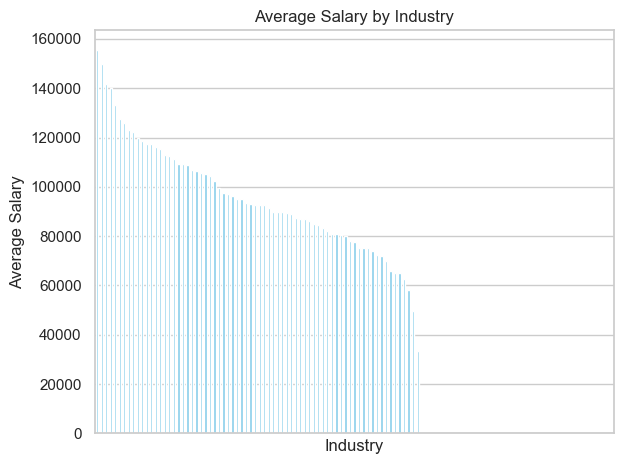

In [ ]:
average_salary = df_merged.groupby('industry')['salary_standardized'].mean()
average_salary_sorted = average_salary.sort_values(ascending=False)
average_salary_sorted.plot(kind='bar', color='skyblue')

plt.xlabel('Industry')
plt.ylabel('Average Salary')
plt.title('Average Salary by Industry')
plt.xticks([])
plt.tight_layout()

plt.show()

## Findings

### What are the most in-demand skills across industries?

In [ ]:
from collections import Counter


# Flatten the list of tokens and count unique values
all_tokens = [token for sublist in df_merged['description_tokens'] for token in sublist]
print(all_tokens[0])
token_counts = Counter(all_tokens)

# Convert to DataFrame for better readability
token_counts_df = pd.DataFrame(token_counts.items(), columns=['Token', 'Count']).sort_values(by='Count', ascending=False)

# Display the top 20 most common tokens
print(token_counts_df.head(20))

### Which cities have the highest demand for Data Scientists?

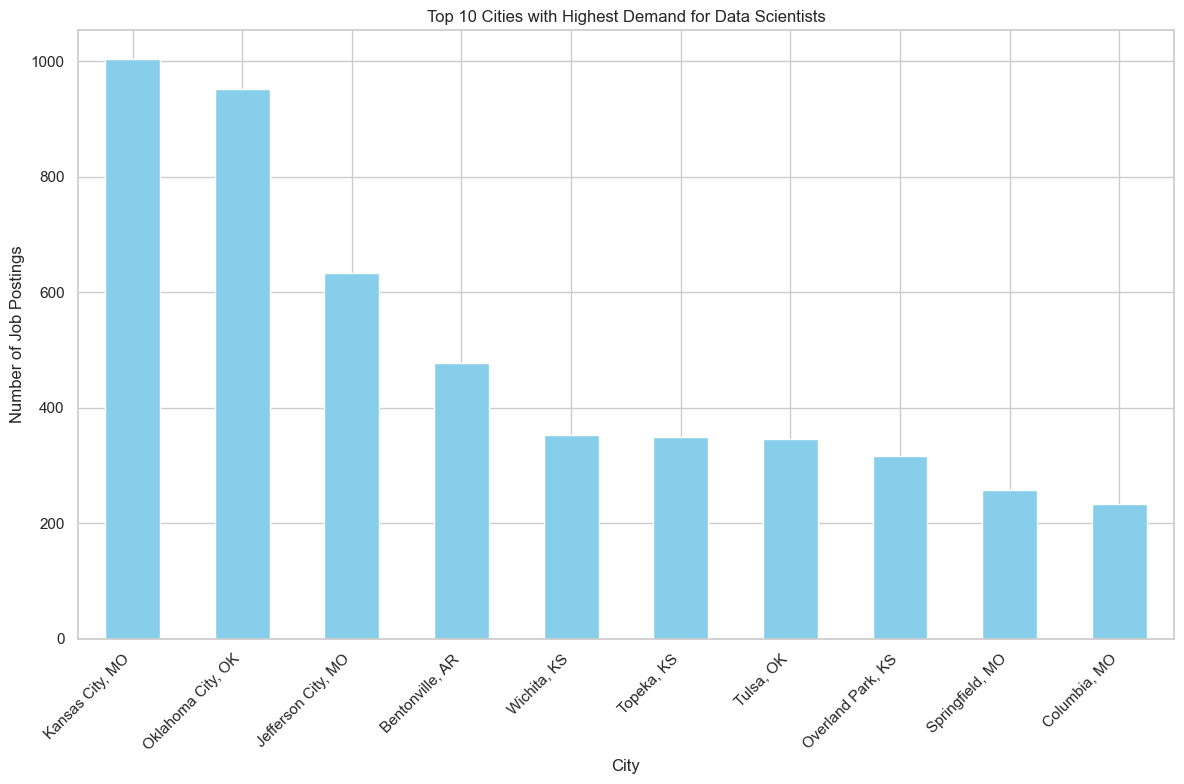

In [ ]:
# Count the number of job postings for Data Scientists in each city
# exclude Anywhere and Remote and United States when counting the number of most popular locations
city_demand = df_merged['location'].value_counts().drop(['Anywhere', 'United States']).head(10)

# Plot the top 10 cities with the highest demand for Data Scientists
plt.figure(figsize=(12, 8))
city_demand.plot(kind='bar', color='skyblue')
plt.xlabel('City')
plt.ylabel('Number of Job Postings')
plt.title('Top 10 Cities with Highest Demand for Data Scientists')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### What proportion of job postings are for remote roles? Which industries are leading in remote work adoption?

Proportion of job postings that are remote: 48.82%
Top industries leading in remote work adoption:
industry
Freight and Package Transportation               1.000000
Fundraising                                      1.000000
Venture Capital and Private Equity Principals    1.000000
Computer Networking Products                     1.000000
Political Organizations                          1.000000
Religious Institutions                           1.000000
Railroad Equipment Manufacturing                 1.000000
Technology, Information and Internet             0.833333
Software Development                             0.815399
Newspaper Publishing                             0.800000
Name: work_from_home, dtype: float64


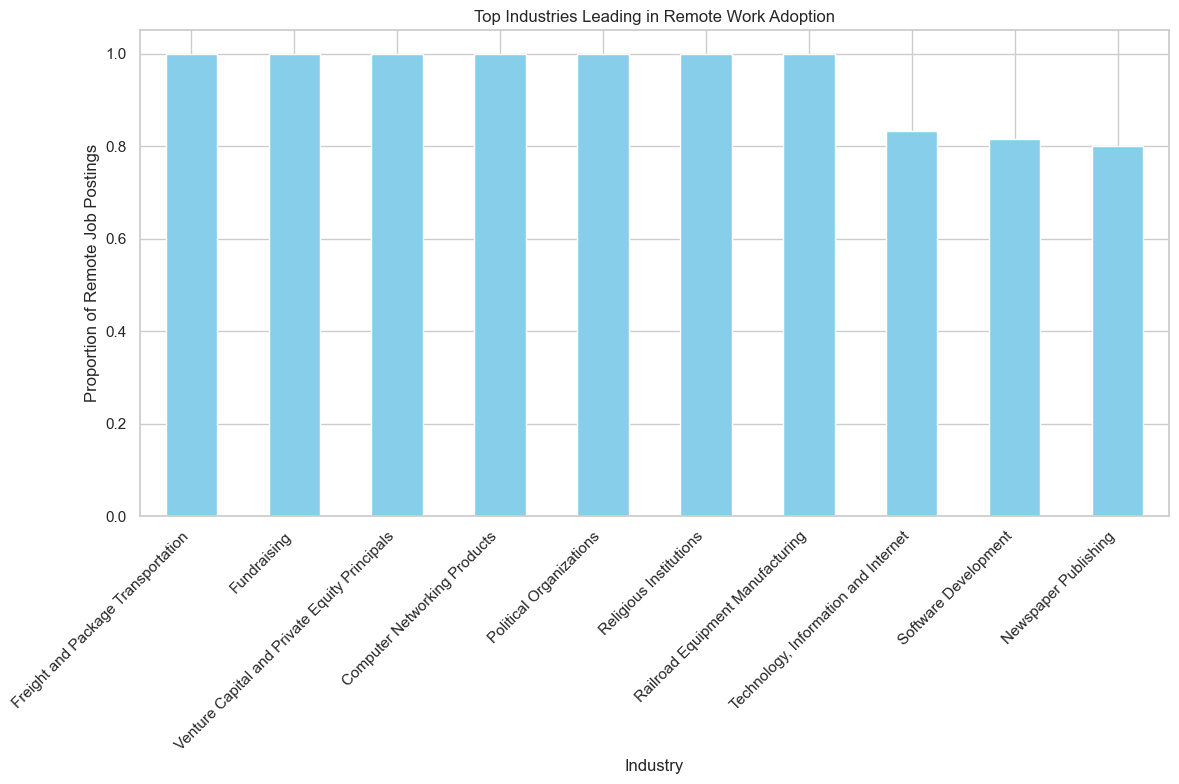

In [ ]:
# Calculate the proportion of remote job postings
remote_jobs = df_merged['work_from_home'].fillna(False).astype(bool)
remote_proportion = remote_jobs.mean()
print(f'Proportion of job postings that are remote: {remote_proportion:.2%}')

# Calculate the proportion of remote job postings by industry
remote_by_industry = df_merged.groupby('industry')['work_from_home'].apply(lambda x: x.fillna(False).astype(bool).mean()).sort_values(ascending=False)

# Display the top industries leading in remote work adoption
print('Top industries leading in remote work adoption:')
print(remote_by_industry.head(10))

# Plot the top industries leading in remote work adoption
plt.figure(figsize=(12, 8))
remote_by_industry.head(10).plot(kind='bar', color='skyblue')
plt.xlabel('Industry')
plt.ylabel('Proportion of Remote Job Postings')
plt.title('Top Industries Leading in Remote Work Adoption')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### What are the seasonal patterns in job postings? What is the basic trend in recent years? Specifically, what about Data Scientist entry level jobs? (decomposition)

<Figure size 1200x800 with 0 Axes>

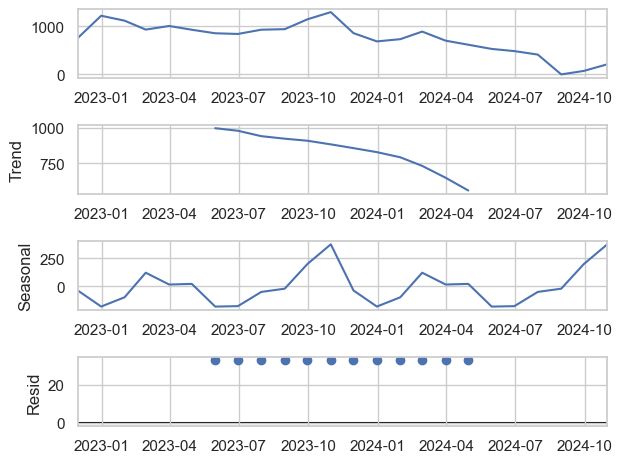

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Ensure the date_time column is in datetime format
df_merged['date_time'] = pd.to_datetime(df_merged['date_time'])

# Filter for Data Scientist entry-level jobs or 0 - 1 years of experience
entry_level_jobs = df_merged[df_merged['Years_of_Experience'].between(0, 1) | df_merged['Years_of_Experience'].isnull() | (df_merged['description'].str.contains('entry level', case=False))]

# Group by month and count the number of job postings
monthly_jobs = entry_level_jobs.resample('M', on='date_time').size()

# Decompose the time series
decomposition = seasonal_decompose(monthly_jobs, model='additive')

# Plot the decomposition
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.show()

## Feature Engineering

In [17]:
df_merged.columns

Index(['title', 'company_name', 'location', 'via', 'description', 'extensions',
       'job_id', 'thumbnail', 'posted_at', 'schedule_type', 'work_from_home',
       'salary', 'search_term', 'date_time', 'search_location', 'commute_time',
       'salary_pay', 'salary_rate', 'salary_avg', 'salary_min', 'salary_max',
       'salary_hourly', 'salary_yearly', 'salary_standardized',
       'description_tokens', 'company_id', 'name', 'company_description',
       'company_size', 'state', 'country', 'city', 'zip_code', 'address',
       'url', 'industry', 'Years_of_Experience'],
      dtype='object')

### Text-based Features - Job Level

In [21]:
def extract_job_level(description):
    description = description.lower()
    if any(keyword in description for keyword in ['senior', 'lead', 'manager', 'director']):
        return 'Senior'
    elif any(keyword in description for keyword in ['mid-level', 'associate', 'regular']):
        return 'Mid'
    elif any(keyword in description for keyword in ['entry-level', 'junior', 'intern', 'trainee']):
        return 'Entry'
    else:
        return 'Unspecified'
df_merged['job_level'] = df_merged['title'].apply(extract_job_level)
df_merged['job_level'] = df_merged['description'].apply(extract_job_level)

In [22]:
non_empty_count = df_merged['job_level'].notnull() & (df_merged['job_level'] != 'Unspecified')
non_empty_count = non_empty_count.sum()
print('There are', non_empty_count, 'out of', len(df_merged), 'job postings with job_level in job description.')

There are 30171 out of 41622 job postings with job_level in job description.


### Text-based Features - TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=500)
tfidf_matrix = tfidf.fit_transform(df_merged['job_description'])

### Text-based Features - Soft Skills

In [ ]:
from skillNer.skill_extractor_class import SkillExtractor
from skillNer.general_params import SKILL_DB

skill_extractor = SkillExtractor(SKILL_DB)

soft_skills_list = [
    'communication', 'teamwork', 'problem-solving', 'adaptability', 'creativity',
    'work ethic', 'time management', 'interpersonal skills', 'leadership', 'collaboration',
    'flexibility', 'critical thinking', 'organization', 'attention to detail',
    'decision making', 'empathy', 'negotiation', 'conflict resolution', 'attention to detail',
    'presentation skill', 'curiosity', 'self-motivation', 'conflict resolution'
]

def extract_soft_skills(text):
    annotations = skill_extractor.annotate(text)
    soft_skills = [
        skill['doc_node_value'] for skill in annotations['results']['full_matches'] if skill['doc_node_value'].lower() in soft_skills_list
    ]
    return soft_skills

df['soft_skills'] = df['job_description'].apply(extract_soft_skills)

### Categorical Features - One-Hot Encoding for Industry

In [ ]:
df_merged = pd.get_dummies(df_merged, columns=['industry'], drop_first=True)

### Categorical Features - One-Hot Encoding for Location

In [28]:
df_merged = pd.get_dummies(df_merged, columns=['location'], drop_first=True)

There are 41593 out of 41622 job postings with location in job description.


### Numerical Features - Job Description Length

In [25]:
df_merged['average_length'] = df_merged['description'].str.len().mean()

### Numerical Features - Number of Required Technical Skills

In [33]:
df_merged['num_skills'] = df_merged['description_tokens'].apply(len)